# Load data

In [3]:
import pandas as pd

_STOCK = "HAX"

data_path = "../stock_data"
df1 = pd.read_excel(f"{data_path}/{_STOCK}.xlsx", sheet_name='bctc', header=None)
df1.dropna(axis=1, how="all", inplace=True)
new_column_names = [
    "Mục",
    "Q3 2022",
    "Q4 2022",
    "Q1 2023",
    "Q2 2023",
    "Q3 2023",
]
df1.columns = new_column_names
df1.iloc[:, 1:] = df1.iloc[:, 1:].replace({',': ''}, regex=True).astype(float)
df1

,Mục,Q3 2022,Q4 2022,Q1 2023,Q2 2023,Q3 2023
0,Tổng doanh thu hoạt động kinh doanh,1970.49,1597.77,992.68,797.17,1115.26
1,Các khoản giảm trừ doanh thu,0.0,0.0,0.00,0.00,0.0
2,Doanh thu thuần,1970.49,1597.77,992.68,797.17,1115.26
3,Giá vốn hàng bán,1853.89,1481.01,915.98,740.74,1050.6
4,Lợi nhuận gộp,116.61,116.76,76.71,56.43,64.66
5,Doanh thu hoạt động tài chính,7.85,3.73,0.06,0.01,0.46
6,Chi phí tài chính,5.98,18.49,17.81,9.21,5.63
7,Trong đó: Chi phí lãi vay,5.94,18.45,17.74,9.21,5.63
8,Lợi nhuận hoặc lỗ trong công ty liên kết,0.0,0.0,0.00,0.00,0.0
9,Chi phí bán hàng,37.07,40.45,36.93,37.12,27.67


In [4]:
df2 = pd.read_excel(f"{data_path}/{_STOCK}.xlsx", sheet_name="cdkt", header=None)
df2.dropna(axis=1, how="all", inplace=True)
new_column_names = [
    "Mục",
    "Q3 2022",
    "Q4 2022",
    "Q1 2023",
    "Q2 2023",
    "Q3 2023",
]
df2.columns = new_column_names
df2.iloc[:, 1:] = df2.iloc[:, 1:].replace({',': ''}, regex=True).astype(float)
df2

,Mục,Q3 2022,Q4 2022,Q1 2023,Q2 2023,Q3 2023
0,Tài sản ngắn hạn,1184.18,1591.19,1043.82,640.41,880.7
1,Tiền và các khoản tương đương tiền,150.83,160.49,83.98,65.46,53.39
2,Tiền,150.83,160.49,83.98,49.86,53.39
3,Các khoản tương đương tiền,0.0,0.0,0.0,15.6,0.0
4,Các khoản đầu tư tài chính ngắn hạn,207.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
104,Nguồn vốn đầu tư XDCB,0.0,0.0,0.0,0.0,0.0
105,Nguồn kinh phí và quỹ khác,0.0,0.0,0.0,0.0,0.0
106,Vốn ngân sách nhà nước,0.0,0.0,0.0,0.0,0.0
107,Nguồn kinh phí đã hình thành TSCĐ,0.0,0.0,0.0,0.0,0.0


# Tính 11 bộ chỉ số

- Sales Growth Rate 
- EPS Growth Rate
- BVPS Growth Rates
- Tăng trưởng OPC LCDTKD
- Nợ dài hạn năm gần nhất
- Effectiveness(Doanh thu/Tài sản)
- Effciency(Lợi nhuận/Doanh thu)
- Productivity(OPC LCDTKD/Lợi nhuận)
- ROA
- ROE
- ROIC

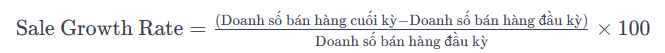

In [5]:
def cal_sale_growth_rate(row_name = "Tổng doanh thu hoạt động kinh doanh"):
    row_index = df1.iloc[:, 0][df1["Mục"] == row_name].index[0]
    revenue = df1.iloc[row_index, 1: ] 
    result = (revenue - revenue.shift(1).fillna(0)) * 100.0 / revenue
    return result[1:]

In [6]:
result = cal_sale_growth_rate()
result

Q4 2022   -23.327513
Q1 2023   -60.955192
Q2 2023   -24.525509
Q3 2023      28.5216
Name: 0, dtype: object

In [7]:
def cal_eps_growth_rate(row_name="Lợi nhuận sau thuế thu nhập doanh nghiệp"):
    row_index = df1.iloc[:, 0][df1["Mục"] == row_name].index[0]
    eps =  df1.iloc[row_index, 1: ] 
    

In [8]:
headers = {
    'authority': 'fwtapi2.fialda.com',
    'method': 'GET',
    'scheme' : 'https',
    'Accept' : 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Encoding' : 'gzip, deflate, br',
    'Accept-Language' : 'en-US,en;q=0.9',
    'Cache-Control' : 'max-age=0',
    'Sec-Ch-Ua' : '"Not_A Brand";v="8", "Chromium";v="120", "Microsoft Edge";v="120"',
    'Sec-Ch-Ua-Mobile' : '?0',
    'Sec-Ch-Ua-Platform' : '"Windows"',
    'Sec-Fetch-Dest' : 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site' : 'None',
    'Sec-Fetch-User' : '?1',
    'Upgrade-Insecure-Requests' : '1',
    'User-Agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36 Edg/120.0.0.0"
}

In [17]:
import requests

# Địa chỉ API bạn muốn gọi
api_url = "https://fwtapi2.fialda.com/api/services/app/TechnicalAnalysis/GetFinancialHighlights?symbol=NT2"

# Gọi API bằng phương thức GET (hoặc POST, tùy thuộc vào yêu cầu của API)
response = requests.get(api_url,headers=headers)

# Kiểm tra xem có lỗi không (status code 200 là thành công)
if response.status_code == 200:
    # In nội dung phản hồi
    response = response.json()["result"]
else:
    # In lỗi nếu có
    print(f"Lỗi {response.status_code}: {response.text}")

In [18]:
response_lenght = len(response)
df_api = pd.DataFrame()
for i in range(response_lenght):
    df_api = pd.concat([df_api, pd.DataFrame([response[i]])])

C:\Users\quang\AppData\Local\Temp\ipykernel_14656\3811709233.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_api = pd.concat([df_api, pd.DataFrame([response[i]])])


In [19]:
df_api.to_excel("../stock_data/NT2_api.xlsx")